## Nobel Prize Dataset
---

In [41]:
from tkinter.constants import FIRST

import pandas as pd
import plotly.express as px
from matplotlib.lines import lineStyles
from pandas.conftest import axis_1

In [42]:
df = pd.read_csv("nobel_prize_data.csv")

df.sample(5)

,year,category,prize,motivation,prize_share,laureate_type,full_name,birth_date,birth_city,birth_country,birth_country_current,sex,organization_name,organization_city,organization_country,ISO
29,1905,Peace,The Nobel Peace Prize 1905,NaN,1/1,Individual,"Baroness Bertha Sophie Felicita von Suttner, n...",1843-06-09,Prague,Austrian Empire (Czech Republic),Czech Republic,Female,NaN,NaN,NaN,CZE
416,1972,Chemistry,The Nobel Prize in Chemistry 1972,"""for his work on ribonuclease, especially conc...",1/2,Individual,Christian B. Anfinsen,1916-03-26,"Monessen, PA",United States of America,United States of America,Male,National Institutes of Health,"Bethesda, MD",United States of America,USA
723,2001,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for their analyses of markets with asymmetric...",1/3,Individual,George A. Akerlof,1940-06-17,"New Haven, CT",United States of America,United States of America,Male,University of California,"Berkeley, CA",United States of America,USA
14,1903,Literature,The Nobel Prize in Literature 1903,"""as a tribute to his noble, magnificent and ve...",1/1,Individual,Bjørnstjerne Martinus Bjørnson,1832-12-08,Kvikne,Norway,Norway,Male,NaN,NaN,NaN,NOR
373,1966,Medicine,The Nobel Prize in Physiology or Medicine 1966,"""for his discoveries concerning hormonal treat...",1/2,Individual,Charles Brenton Huggins,1901-09-22,Halifax,Canada,Canada,Male,University of Chicago,"Chicago, IL",United States of America,CAN


### Initial checks( Pandas)
---

In [43]:
### Get an understanding of the dataset
df.shape            # 962 by 16
df.head()           # 1901 is the earliest
df.tail()           # 2020 is the latest date
df.columns          # Need to adjust
df.dtypes           # Year needs to be adjusted + prize share as well
df.isna().sum()     # There are missing values in some categories, not the first ones
                    ## More likely for the latter categories --> Mainly for more complicated variables.
df.duplicated(keep= False).sum()        # There are no duplicated values
df.columns          # Some columns need to be removed


Index(['year', 'category', 'prize', 'motivation', 'prize_share',
       'laureate_type', 'full_name', 'birth_date', 'birth_city',
       'birth_country', 'birth_country_current', 'sex', 'organization_name',
       'organization_city', 'organization_country', 'ISO'],
      dtype='object')

In [44]:
## Adjustments from the earlier analysis:

#### Keep the columns+ Change the names to make it easier to access
df.rename(columns= {'year': "Year",
                    'category':"Category",
                    'prize': "Prize",
                    'motivation':" Motivation",
                    'prize_share':"Prize_Share",
                    'laureate_type':"Laureate_Type",
                    'full_name' :"Full_Name",
                    'birth_date':"Birth_Date",
                    'birth_city':"Birth_City",
                    'birth_country':"Birth_Country",
                    'birth_country_current':"Birth Country_Current",
                    'sex':"Sex",
                    'organization_name':"Organization_Name",
                    'organization_city':"Organisation_City",
                    'organization_country':"Organisation_Country",
                    'ISO':"ISO"}, inplace=True)


df["Year"] = pd.to_datetime(df["Year"].astype(str), format="%Y")



values = df["Prize_Share"].str.split("/", expand=True)      # Split the values horizontally
numerator= pd.to_numeric(values[0])
denominator= pd.to_numeric(values[1])
share_pct:float                                             # assignment of float
share_pct =numerator/denominator
df["Share_Pct"] =share_pct                                  # Saved into a new column.
#
df.head()


,Year,Category,Prize,Motivation,Prize_Share,Laureate_Type,Full_Name,Birth_Date,Birth_City,Birth_Country,Birth Country_Current,Sex,Organization_Name,Organisation_City,Organisation_Country,ISO,Share_Pct
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Netherlands,Male,Berlin University,Berlin,Germany,NLD,1.0
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,Individual,Sully Prudhomme,1839-03-16,Paris,France,France,Male,NaN,NaN,NaN,FRA,1.0
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Poland,Male,Marburg University,Marburg,Germany,POL,1.0
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Frédéric Passy,1822-05-20,Paris,France,France,Male,NaN,NaN,NaN,FRA,0.5
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Switzerland,Male,NaN,NaN,NaN,CHE,0.5


### Visualisation( Plotly)
---


Create a donut chart using plotly which shows how many prizes went to men compared to how many prizes went to women. What percentage of all the prizes went to women?

In [45]:
men_and_women  = df["Sex"].value_counts()
print(men_and_women)

fig = px.pie(names =men_and_women.index, values = men_and_women.values, title =" Number of Nobel Laureates by Sex", hole= 0.6)
fig.update_traces(textposition="outside", textinfo="percent+label")
fig.show()

Sex
Male      876
Female     58
Name: count, dtype: int64


What are the names of the first 3 female Nobel laureates?

What did the win the prize for?

What do you see in their birth_country? Were they part of an organisation?



In [46]:
# Names of the first three nobel laureates
first_female_laureates = df[df["Sex"]=="Female"].sort_values(by = "Year" , ascending=True )[:5]
first_female_laureates["Category"]          # Shows the categories of the topics
first_female_laureates["Birth_Country"]     # Shows their brith countries
first_female_laureates["Organization_Name"]

18                     NaN
29                     NaN
51                     NaN
62     Sorbonne University
128                    NaN
Name: Organization_Name, dtype: object


Did some people get a Nobel Prize more than once? If so, who were they?

In [47]:
duplicated = df[["Full_Name", "Birth_Date"]].duplicated(keep = False)           # Returns a boolean. Feed the boolean back inot thethe df function and then do sort values
df[duplicated].sort_values("Full_Name", ascending = False)["Full_Name"].nunique()           # 6 unique people won twice
names = df[duplicated]["Full_Name"].unique()   # Pulls the number of unique names:
final_names = names.tolist()
print(f"There were 6 multiple winners of the Nobel Prize. ")
for name in names:
    print(" -", name)


There were 6 multiple winners of the Nobel Prize. 
 - Marie Curie, née Sklodowska
 - Comité international de la Croix Rouge (International Committee of the Red Cross)
 - Linus Carl Pauling
 - Office of the United Nations High Commissioner for Refugees (UNHCR)
 - John Bardeen
 - Frederick Sanger


In how many categories are prizes awarded?

Create a plotly bar chart with the number of prizes awarded by category.

Use the color scale called Aggrnyl to colour the chart, but don't show a color axis.

Which category has the most number of prizes awarded?

Which category has the fewest number of prizes awarded?

In [48]:
df["Category"].nunique()            # There are siz categories

#----------------------------------------Number of Prizes by Cateogory ------------------------------#
categories_prizes = df["Category"].value_counts()
chart= px.bar( x= categories_prizes.index,
               y=  categories_prizes.values,
               title=" Nobel Prizes by Category",
               labels = {"x": "Categories", "y": "Prizes"},
               color_continuous_scale="Aggrnyl",
               color = categories_prizes.values,
               )
chart.update_layout(coloraxis_showscale=True)
chart.show()

            # Largest number of Prizes in Medicine and smallest is in Economics.

When was the first prize in the field of Economics awarded?

Who did the prize go to?

In [50]:
economics_subset = df[df["Category"]== "Economics"].sort_values(by = "Year" , ascending=True )
first_economics_prize = economics_subset.iloc[0,:]              # First position
economics_year = first_economics_prize["Year"]
economics_who = first_economics_prize["Full_Name"]
print(f"The first economics prize went to { economics_who} in {economics_year}.")


The first economics prize went to Jan Tinbergen in 1969.


Year                                                                  1969
Category                                                         Economics
Prize                    The Sveriges Riksbank Prize in Economic Scienc...
 Motivation              "for having developed and applied dynamic mode...
Prize_Share                                                            1/2
Laureate_Type                                                   Individual
Full_Name                                                    Jan Tinbergen
Birth_Date                                                      1903-04-12
Birth_City                                                       the Hague
Birth_Country                                                  Netherlands
Birth Country_Current                                          Netherlands
Sex                                                                   Male
Organization_Name                      The Netherlands School of Economics
Organisation_City        

Create a plotly bar chart that shows the split between men and women by category.

In [ ]:
    # This produces a series weith multi index
dataset = df[["Sex", "Category"]].value_counts().reset_index()


            ## Can also use group by to get the same thing. Use this when you want more control- group by more things etc

cat_men_women = df.groupby(['Category', 'Sex'],as_index=False).agg({'Prize': pd.Series.count})
cat_men_women.sort_values('Prize', ascending=False, inplace=True)
cat_men_women

In [ ]:
    # Name is the bale that appears in the neged.
    ## Best to split them by categories into different datasets into different forms. Same with the pri charts.


import plotly.graph_objects as go
male= dataset[dataset["Sex"]=="Male"]
female= dataset[dataset["Sex"]=="Female"]

fig = go.Figure(data=[
    go.Bar(name="Male", x=male["Category"], y=male["count"]),
    go.Bar(name="Female", x=female["Category"], y=female["count"])
])
# Change the bar mode
fig.update_layout(barmode='group',
                  title="Nobel Laureates by Gender",
                  )

fig.update_xaxes(title_text="Subject")

# Optional: Change Y-axis label too
fig.update_yaxes(title_text="Number of Nobel Laureates")

fig.show()


### Using Matplotlib to Visualise Trends over Time
---

In [150]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates

Are more prizes awarded recently than when the prize was first created? Show the trend in awards visually.

Count the number of prizes awarded every year.



In [165]:
prizes_per_year = df.groupby("Year").agg({"Prize":"count"})
     # Conversion type was wrong. So need to ocnvert it
prizes_per_year = prizes_per_year.sort_values("Year")
prizes_per_year= prizes_per_year.reset_index()


prizes_per_year["Year"]= pd.to_datetime(prizes_per_year["Year"].astype(str), format="%Y")
prizes_per_year["Moving"] = prizes_per_year["Prize"].rolling(window = 5).mean()
prizes_per_year.tail()

,Year,Prize,Moving
112,2016-01-01,11,11.6
113,2017-01-01,12,12.0
114,2018-01-01,13,12.0
115,2019-01-01,14,12.2
116,2020-01-01,12,12.4


Create a 5 year rolling average of the number of prizes (Hint: see previous lessons analysing Google Trends).

Using Matplotlib superimpose the rolling average on a scatter plot.

Show a tick mark on the x-axis for every 5 years from 1900 to 2020. (Hint: you'll need to use NumPy).

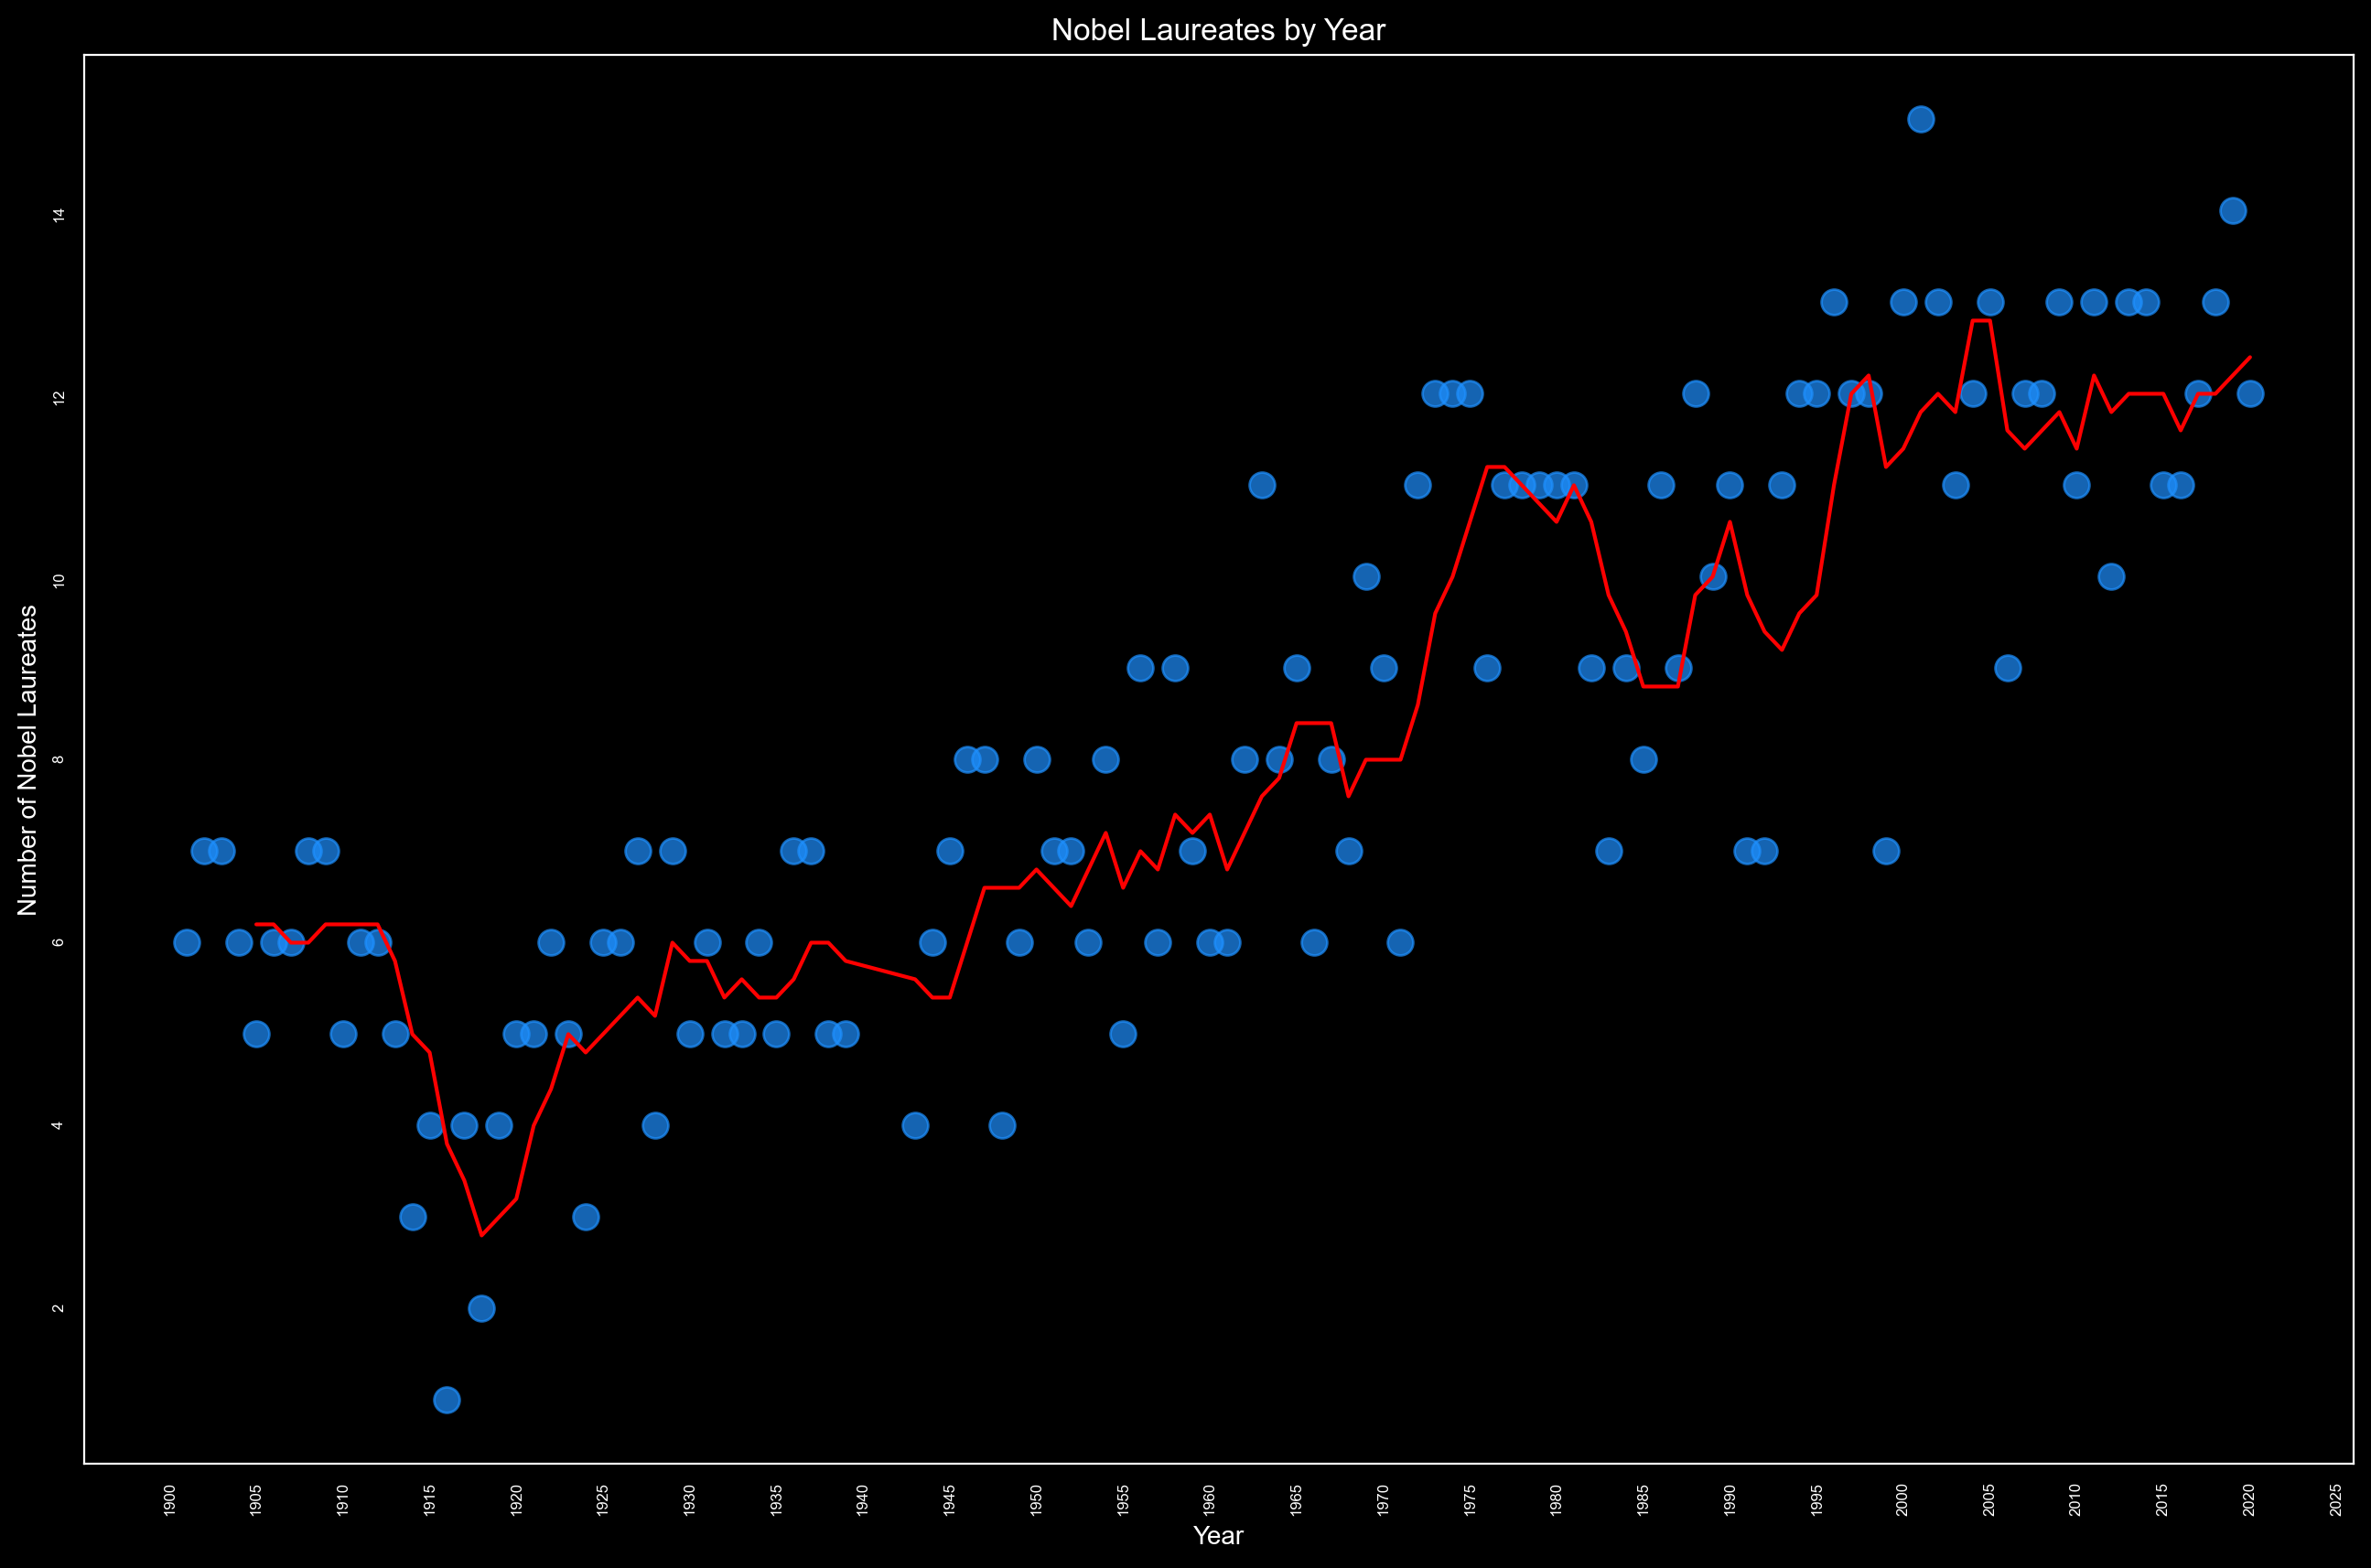

In [167]:
plt.figure(figsize = (16,10), dpi= 200)
# steps = np.arange(1900, 2020, 5)
plt.xticks( rotation = 90, fontsize = 6)                # add in ticks = steps if the year column is just numers
plt.yticks(rotation = 90, fontsize = 6)

plt.scatter(x =prizes_per_year["Year"],
                    y =prizes_per_year["Prize"],
                    linestyles = "-",
                    c='dodgerblue',
                   alpha=0.7,                   # Transparency of the points
                   s=100,)                      # Size of each point
plt.plot(prizes_per_year["Year"],
         prizes_per_year["Moving"],
         color = "red",)

ax1 =plt.gca()
## you coul;d also use mdates
year= mdates.YearLocator(base= 5)
years_FMT = mdates.DateFormatter('%Y')
ax1.xaxis.set_major_locator(year)
ax1.xaxis.set_major_formatter(years_FMT)

plt.xlabel("Year")
plt.ylabel("Number of Nobel Laureates")
plt.title("Nobel Laureates by Year")
plt.grid(False)

plt.show()
